# homework2.1-重构靶
- 查看PPAC重构的径迹；
- 查看PPAC重构靶大小；
- 得到在靶上有效区域的事件比；

## 打开root文件

In [1]:
TFile *ipf=new TFile("./ana/homework2.1.root");
TTree *tree=(TTree*) ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");

## 查看粒子径迹
- x-z

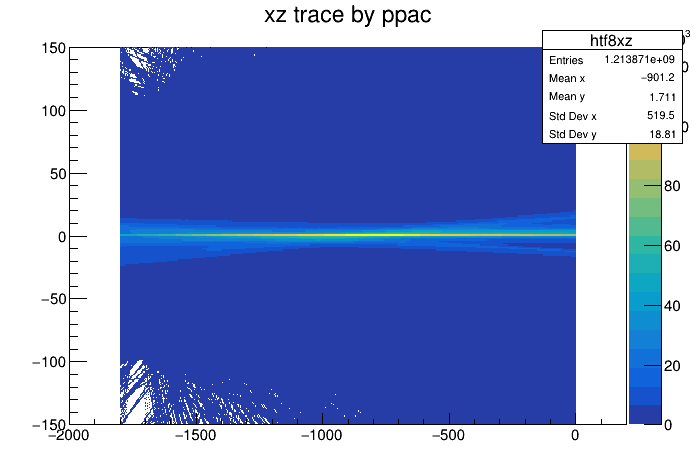

In [2]:
TH2D *hxz=(TH2D*) ipf->Get("htf8xz");
//gStyle->SetPalette(1);
hxz->Draw("colz");
//c1->SetLogz();
c1->Draw();

- y-z

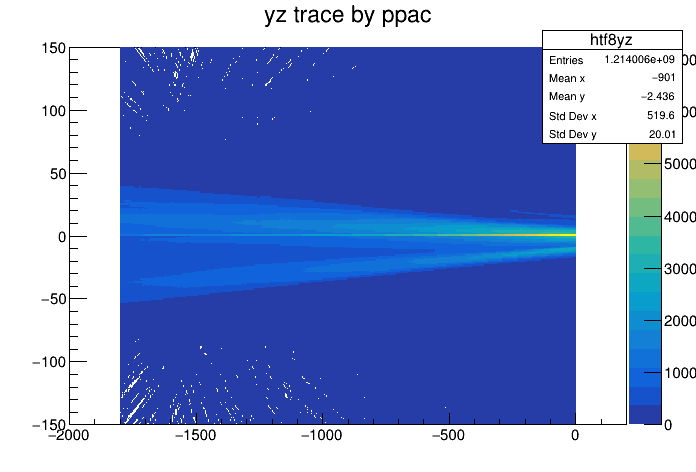

In [3]:
TH2D *hyz=(TH2D*) ipf->Get("htf8yz");
hyz->Draw("colz");
c1->Draw();

## 束流在靶上投影
- 靶与束流夹角45度

**硅条触发（未卡条件）**

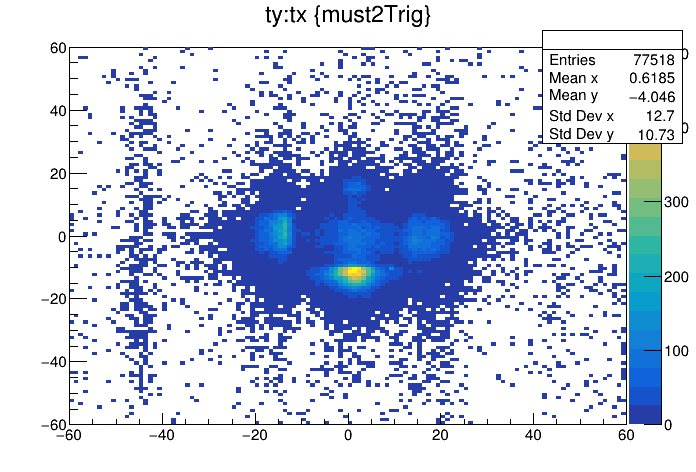

In [4]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","must2Trig","colz");
c1->Draw();

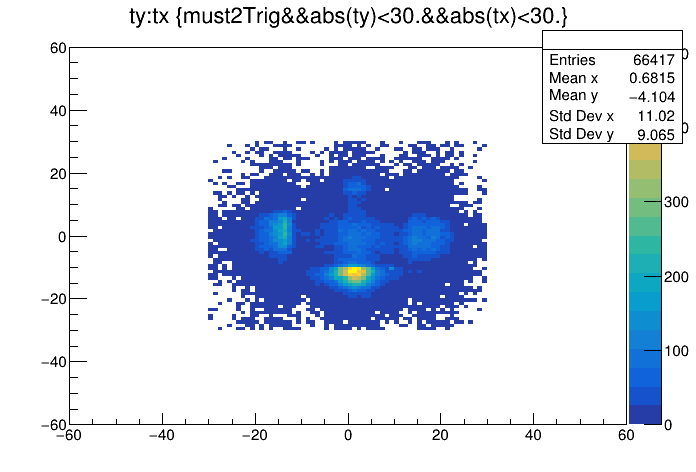

all event:  66417


In [5]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","must2Trig&&abs(ty)<30.&&abs(tx)<30.","colz");
c1->Draw();
TGraph *gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
Double_t event_all = gtarget->GetN();
cout<<"all event:  "<<event_all<<endl;

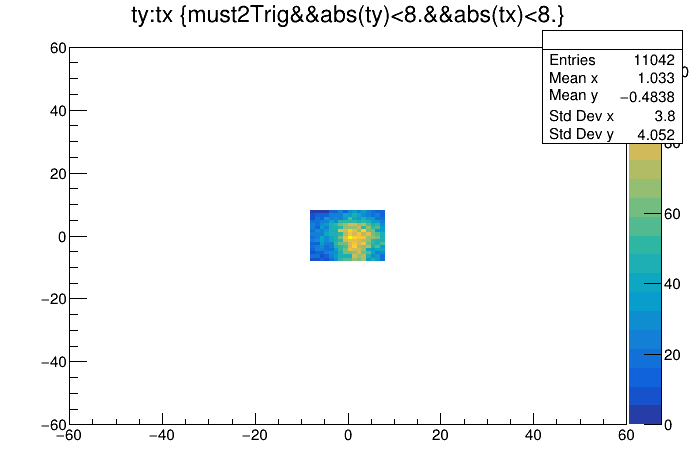

event on target： 11042
ratio of event at target： 16.6253%


In [6]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","must2Trig&&abs(ty)<8.&&abs(tx)<8.","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
Double_t event_on = gtarget->GetN();
cout<<"event on target： "<<event_on<<endl;
cout<<"ratio of event at target： "<<event_on/event_all * 100<<"%"<<endl;

**束流触发（未卡条件）**

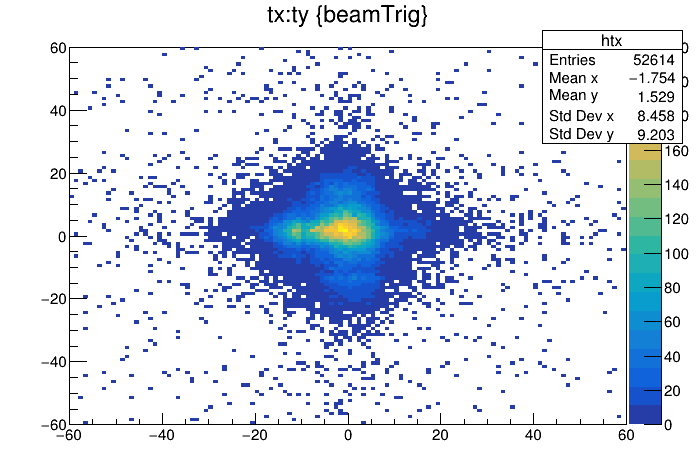

In [7]:
tree->Draw("tx:ty>>htx(120,-60,60,120,-60,60)","beamTrig","colz");
c1->Draw();

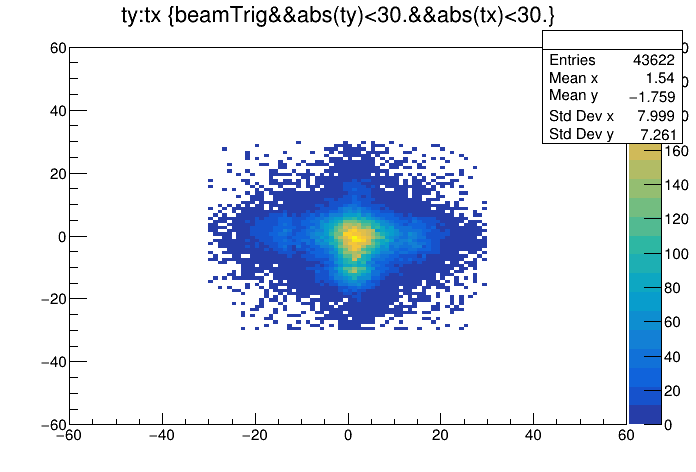

all event:  43622


In [8]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","beamTrig&&abs(ty)<30.&&abs(tx)<30.","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
event_all = gtarget->GetN();
cout<<"all event:  "<<event_all<<endl;

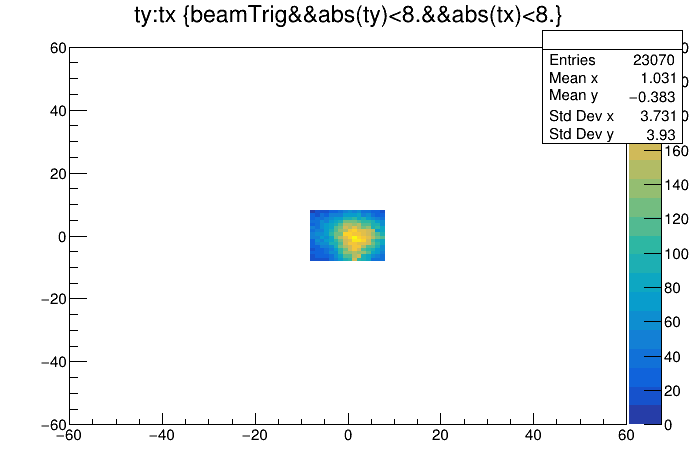

event on target： 23070
ratio of event at target： 52.8862%


In [9]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","beamTrig&&abs(ty)<8.&&abs(tx)<8.","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
event_on = gtarget->GetN();
cout<<"event on target： "<<event_on<<endl;
cout<<"ratio of event at target： "<<event_on/event_all * 100<<"%"<<endl;

**为什么束流触发打靶比例比硅条触发的要高？？？**

**硅条触发（卡c2nx<20&&c2ny<20条件）**

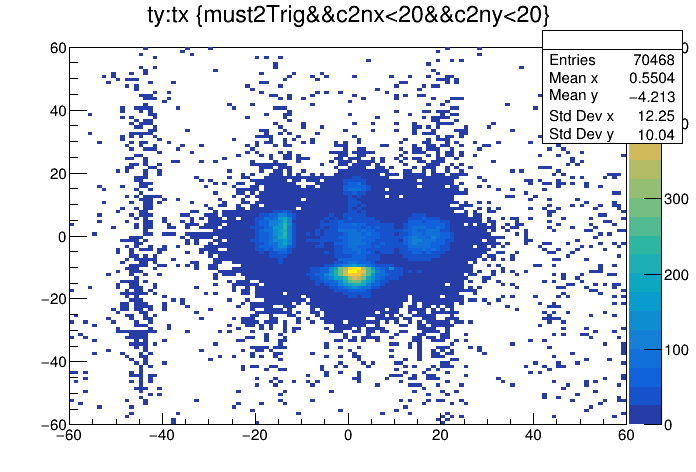

In [10]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","must2Trig&&c2nx<20&&c2ny<20","colz");
c1->Draw();

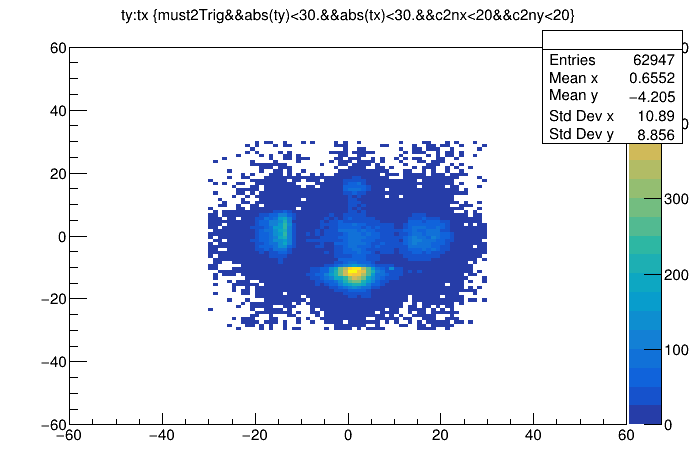

all event:  62947


In [11]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","must2Trig&&abs(ty)<30.&&abs(tx)<30.&&c2nx<20&&c2ny<20","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
event_all = gtarget->GetN();
cout<<"all event:  "<<event_all<<endl;

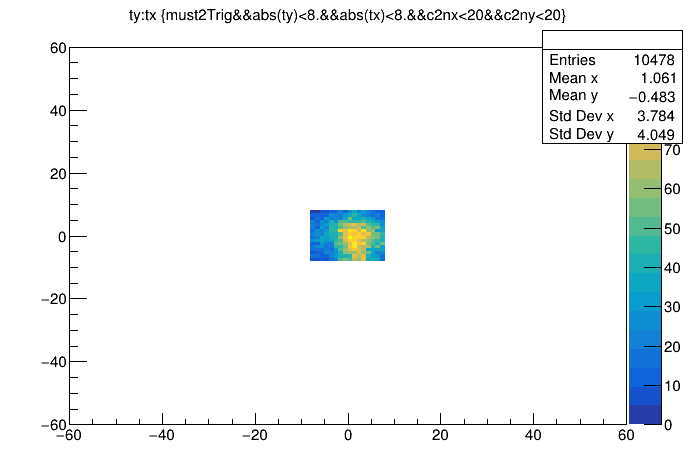

event on target： 10478
ratio of event at target： 16.6457%


In [12]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","must2Trig&&abs(ty)<8.&&abs(tx)<8.&&c2nx<20&&c2ny<20","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
event_on = gtarget->GetN();
cout<<"event on target： "<<event_on<<endl;
cout<<"ratio of event at target： "<<event_on/event_all * 100<<"%"<<endl;

**束流触发（卡c2nx<20&&c2ny<20条件）**

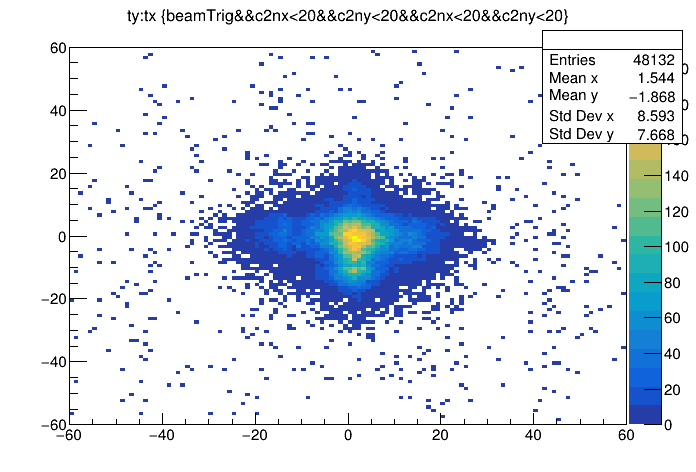

In [13]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","beamTrig&&c2nx<20&&c2ny<20&&c2nx<20&&c2ny<20","colz");
c1->Draw();

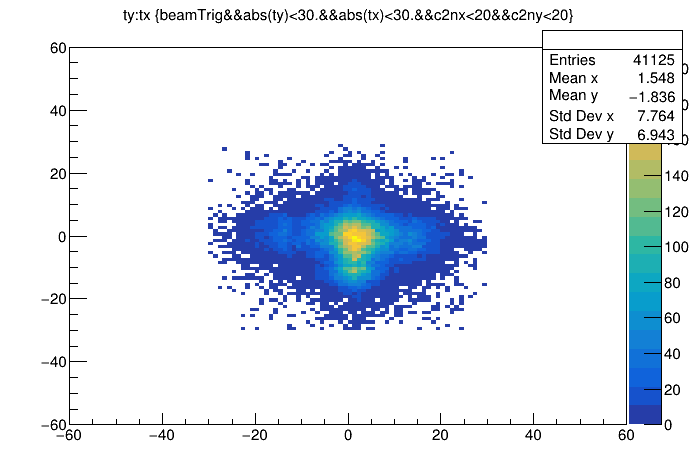

all event:  41125


In [14]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","beamTrig&&abs(ty)<30.&&abs(tx)<30.&&c2nx<20&&c2ny<20","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
event_all = gtarget->GetN();
cout<<"all event:  "<<event_all<<endl;

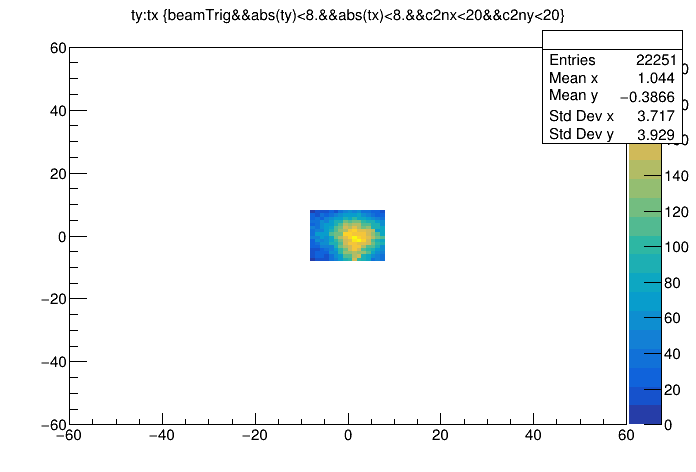

event on target： 22251
ratio of event at target： 54.1058%


In [15]:
tree->Draw("ty:tx>>(120,-60,60,120,-60,60)","beamTrig&&abs(ty)<8.&&abs(tx)<8.&&c2nx<20&&c2ny<20","colz");
c1->Draw();
gtarget = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
event_on = gtarget->GetN();
cout<<"event on target： "<<event_on<<endl;
cout<<"ratio of event at target： "<<event_on/event_all * 100<<"%"<<endl;

**靶上占比总结**

| cut | trig| all  |  on  |  ratio|
|:----:|:----:|:----:|:----:|:----:|
|未卡c2n| Must2Trig|66417|11042|16.625%|
|未卡c2n| beamTrig|43622|23070|52.887%|
|卡c2n| Must2Trig|62947|10478|16.646%|
|卡c2n| beamTrig|41125|22251|54.106%|

In [16]:
!jupyter nbconvert homework2.1_targetpos --to html

[NbConvertApp] Converting notebook homework2.1_targetpos.ipynb to html


